# Multiple ECGs

Creation date: 2020-11-10

Initial authors: Axel Nyström

Commit to use: __insert__ __commit-sha__ __here__ in repository __repo__


## Summary
- Conditions, prerequisites and method
- Key findings
- Recommendations, next thing to do

## Purpose
This is a template to copy and use the good parts of.

## Introduction


## Method


## Imports 

In [1]:
import sys
sys.path.append('..')
import glob
import pprint

In [2]:
import numpy as np
import pandas as pd
import h5py

#this is only for not seeing any warnings in the pdf
import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_csv(path):
    return pd.read_csv(
        path,
        sep='|',
        index_col=False,
        encoding='latin-1'
    )

In [4]:
lund_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/*.csv')))
hbg_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-HBG-2019-12-04/csv_filer/*.csv')))

## Emergency Department

### Lund

In [5]:
lu_ed_raw = read_csv(lund_paths[4])

In [6]:
code_map = {
    'Ã¶': 'ö',
    'Ã¤': 'ä',
    'Ã¥': 'å',
    'Ã©': 'é',
    'Ã\x84': 'Ä',
    'Ã\x85': 'Å',
    'Ã\x96': 'Ö',
    'Ã\x89': 'É',
    '\x9a': 'ö',
    '\x8c': 'å',
    '\x8a': 'ä',
    '\x8e': 'é',
    '\x85': 'Ö',
    '|': ','
}

def fix_str(s):
    for k, v in code_map.items():
        s = s.replace(k, v)
    return s

In [7]:
lu_ed = lu_ed_raw[[
    "Alias", "Inskrivningstid", "Utskrivningstid", "Utskrivningsorsak"
]]
lu_ed["Inskrivningstid"] = pd.to_datetime(lu_ed['Inskrivningstid'], format="%d%b%Y %H:%M:%S")
lu_ed["Utskrivningstid"] = pd.to_datetime(lu_ed['Utskrivningstid'], format="%d%b%Y %H:%M:%S")
lu_ed["Utskrivningsorsak"] = lu_ed["Utskrivningsorsak"].apply(fix_str)
lu_ed

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak
0,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-04-28 12:06:00,2012-04-29 01:17:00,Till avdelning
1,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-08-02 09:08:00,2012-08-02 12:06:00,Till hemmet
2,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2013-06-26 16:49:00,2013-06-27 01:53:00,Till sjukhus
3,{C87751D0-3A73-48A8-A3D7-10FE0F88C966},2011-10-06 11:54:00,2011-10-06 14:42:00,Till avdelning
4,{9684D0C5-1EA0-4E1A-BFDB-A3CD32108F7C},2012-02-17 12:40:00,2012-02-17 18:46:59,Till hemmet
...,...,...,...,...
317159,{88A2BCEC-34D5-4A06-8354-1F0627472BFD},2013-12-14 04:31:59,2013-12-14 14:03:59,Till avdelning
317160,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2010-03-19 17:09:00,2010-03-19 19:09:59,Till avdelning
317161,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2010-04-23 11:18:00,2010-04-23 13:23:00,Till hemmet
317162,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2013-11-18 14:45:00,2013-11-18 17:29:59,Till hemmet


In [8]:
lu_reasons = lu_ed_raw[[f"Besksorsak{i}" for i in range(1, 4)]].stack().dropna()
lu_reasons = lu_reasons.apply(fix_str).str.match("BröstSm").unstack().any(axis=1).rename('is_chest_pain')
lu_ed = lu_ed.join(lu_reasons)
lu_ed

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain
0,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-04-28 12:06:00,2012-04-29 01:17:00,Till avdelning,False
1,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-08-02 09:08:00,2012-08-02 12:06:00,Till hemmet,False
2,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2013-06-26 16:49:00,2013-06-27 01:53:00,Till sjukhus,False
3,{C87751D0-3A73-48A8-A3D7-10FE0F88C966},2011-10-06 11:54:00,2011-10-06 14:42:00,Till avdelning,False
4,{9684D0C5-1EA0-4E1A-BFDB-A3CD32108F7C},2012-02-17 12:40:00,2012-02-17 18:46:59,Till hemmet,False
...,...,...,...,...,...
317159,{88A2BCEC-34D5-4A06-8354-1F0627472BFD},2013-12-14 04:31:59,2013-12-14 14:03:59,Till avdelning,False
317160,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2010-03-19 17:09:00,2010-03-19 19:09:59,Till avdelning,True
317161,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2010-04-23 11:18:00,2010-04-23 13:23:00,Till hemmet,True
317162,{6BF5E124-685A-41DF-91F9-3EA530A5B298},2013-11-18 14:45:00,2013-11-18 17:29:59,Till hemmet,True


### Helsingborg

In [9]:
hbg_ed_raw = read_csv(hbg_paths[1])

In [10]:
code_map_hbg = {
    'Ì¦': 'ö',
    'Ì?': 'ä',
    'Ì´': 'å',
    'Ì©': 'é',
}

def fix_str_hbg(s):
    for k, v in code_map_hbg.items():
        s = s.replace(k, v)
    return s

In [11]:
hbg_ed = hbg_ed_raw[[
    "Alias", "indl_dato", "ud_dato", "discharge_text"
]]
hbg_ed = hbg_ed.rename(
    columns={
        "indl_dato": "Inskrivningstid", 
        "ud_dato": "Utskrivningstid", 
        "discharge_text": "Utskrivningsorsak"
    }
)
hbg_ed["Inskrivningstid"] = pd.to_datetime(hbg_ed["Inskrivningstid"], format="%d%b%Y %H:%M:%S")
hbg_ed["Utskrivningstid"] = pd.to_datetime(hbg_ed["Utskrivningstid"], format="%d%b%Y %H:%M:%S")
hbg_ed["Utskrivningsorsak"] = hbg_ed["Utskrivningsorsak"].fillna("").apply(fix_str_hbg)
hbg_ed

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak
0,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2011-06-09 02:16:00,2011-06-09 06:14:00,Till hemmet
1,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2012-07-16 15:25:00,2012-07-16 19:09:00,Till hemmet
2,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2013-05-04 13:56:00,2013-05-04 19:35:00,Till hemmet
3,{482C83F9-392C-4A8C-B73C-7C5B3B7AE2EC},2012-07-14 13:15:00,2012-07-14 14:37:00,Till avdelning
4,{091258EC-D65B-46FD-8010-DF3427FA17C2},2012-11-17 20:43:00,2012-11-17 23:13:00,Till avdelning
...,...,...,...,...
81195,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},2013-01-19 12:25:00,2013-01-19 18:34:00,Till hemmet
81196,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},2013-04-25 13:11:00,2013-04-25 16:12:00,Till avdelning
81197,{96ADC08C-A02D-4485-868B-BB62450F301A},2010-11-30 06:04:00,2010-11-30 13:31:00,Till avdelning
81198,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2014-04-23 17:07:00,2014-04-23 21:21:00,Till hemmet


In [12]:
hbg_chest_pain_reasons = [
    'Bröstsmärta vid andning RETTS-A 4, Retts-p 104',
    'Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P 114',
    'Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Retts-p 105'
]
hbg_reasons = hbg_ed_raw[[f"visitcause_longtext_{i}" for i in range(1, 4)]].fillna("").stack()
hbg_reasons = hbg_reasons.apply(lambda x: fix_str_hbg(x) in hbg_chest_pain_reasons).unstack().any(axis='columns').rename('is_chest_pain')
hbg_ed = hbg_ed.join(hbg_reasons)
hbg_ed

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain
0,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2011-06-09 02:16:00,2011-06-09 06:14:00,Till hemmet,False
1,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2012-07-16 15:25:00,2012-07-16 19:09:00,Till hemmet,False
2,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2013-05-04 13:56:00,2013-05-04 19:35:00,Till hemmet,True
3,{482C83F9-392C-4A8C-B73C-7C5B3B7AE2EC},2012-07-14 13:15:00,2012-07-14 14:37:00,Till avdelning,False
4,{091258EC-D65B-46FD-8010-DF3427FA17C2},2012-11-17 20:43:00,2012-11-17 23:13:00,Till avdelning,False
...,...,...,...,...,...
81195,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},2013-01-19 12:25:00,2013-01-19 18:34:00,Till hemmet,False
81196,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},2013-04-25 13:11:00,2013-04-25 16:12:00,Till avdelning,False
81197,{96ADC08C-A02D-4485-868B-BB62450F301A},2010-11-30 06:04:00,2010-11-30 13:31:00,Till avdelning,True
81198,{9F56BB00-210E-44B5-BC62-A16E90EA864C},2014-04-23 17:07:00,2014-04-23 21:21:00,Till hemmet,False


### Combined contacts

In [13]:
lu_ed[lu_ed.duplicated(subset=['Alias', 'Inskrivningstid'], keep=False)]

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain


In [14]:
len(lu_ed) - len(lu_ed.dropna(how='any'))

1879

In [15]:
lu_ed_fixed = lu_ed.dropna(how='any')

In [16]:
hbg_ed[hbg_ed.duplicated(subset=['Alias', 'Inskrivningstid'], keep=False)]

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain
587,{56E2DB62-00DF-4770-9A6F-83B5BCDCF209},2012-09-18 21:56:00,NaT,,False
588,{56E2DB62-00DF-4770-9A6F-83B5BCDCF209},2012-09-18 21:56:00,2012-09-19 01:48:00,Till avdelning,False
2482,{E38540A7-F1E5-419A-AEF9-BB5233084634},2014-03-16 10:04:00,NaT,,False
2483,{E38540A7-F1E5-419A-AEF9-BB5233084634},2014-03-16 10:04:00,2014-03-16 16:53:00,Till sjukhus,False
4102,{49085426-5B94-4326-9C42-9F477084DDC4},2013-03-12 16:30:00,NaT,,False
...,...,...,...,...,...
75889,{CB336DCD-4753-486A-AA23-2D57E83919F2},2011-01-21 11:33:00,NaT,,False
76700,{27125B2B-3A8E-4063-8526-373C7F16B596},2013-09-09 10:52:00,NaT,,False
76701,{27125B2B-3A8E-4063-8526-373C7F16B596},2013-09-09 10:52:00,2013-09-09 15:39:00,Till avdelning,False
77663,{47FD113D-8FFE-4B67-9B44-D34A52660FBC},2011-05-06 15:04:00,2011-05-06 18:27:00,Till hemmet,True


In [17]:
hbg_ed.dropna(how='any')[hbg_ed.dropna(how='any').duplicated(subset=['Alias', 'Inskrivningstid'], keep=False)].sort_values(by=['Inskrivningstid', 'Alias'])

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain
47890,{53CF8B86-896E-4058-BA6B-13F778435344},2010-03-02 12:33:00,2010-03-02 12:37:00,Till hemmet,False
47891,{53CF8B86-896E-4058-BA6B-13F778435344},2010-03-02 12:33:00,2010-03-02 16:02:00,Till avdelning,True
42959,{BF9B9F8B-D6D9-441B-9F3F-E884B744AD2D},2011-02-05 18:20:00,2011-02-05 23:31:00,Till sjukhus,False
42960,{BF9B9F8B-D6D9-441B-9F3F-E884B744AD2D},2011-02-05 18:20:00,2011-02-05 18:21:00,Till mottagning,False
14381,{F26D6107-0DF1-446B-9D02-A63A17774DEE},2012-04-01 11:48:00,2012-04-01 11:58:00,Till sjukhus,False
14382,{F26D6107-0DF1-446B-9D02-A63A17774DEE},2012-04-01 11:48:00,2012-04-01 14:48:00,Till hemmet,False


Wtf...

In [18]:
hbg_ed_fixed = (
    hbg_ed
    .dropna(how='any')
    .sort_values(by=['Inskrivningstid', 'Alias', 'Utskrivningstid'])
    .drop_duplicates(subset=['Alias', 'Inskrivningstid'], keep='first')
)

In [19]:
lu_ed_fixed['Origin'] = 'Lund'
hbg_ed_fixed['Origin'] = 'Helsingborg'
ed = pd.concat([lu_ed_fixed, hbg_ed_fixed]).reset_index(drop=True)
ed

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin
0,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-04-28 12:06:00,2012-04-29 01:17:00,Till avdelning,False,Lund
1,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2012-08-02 09:08:00,2012-08-02 12:06:00,Till hemmet,False,Lund
2,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2013-06-26 16:49:00,2013-06-27 01:53:00,Till sjukhus,False,Lund
3,{C87751D0-3A73-48A8-A3D7-10FE0F88C966},2011-10-06 11:54:00,2011-10-06 14:42:00,Till avdelning,False,Lund
4,{9684D0C5-1EA0-4E1A-BFDB-A3CD32108F7C},2012-02-17 12:40:00,2012-02-17 18:46:59,Till hemmet,False,Lund
...,...,...,...,...,...,...
396062,{C29EA076-8146-4B13-A5EB-5D98EC3135DD},2014-12-31 07:48:00,2014-12-31 10:35:00,Till avdelning,False,Helsingborg
396063,{BDAE342E-5975-4D01-97A1-71085596BE60},2014-12-31 09:02:00,2014-12-31 16:10:00,Till hemmet,False,Helsingborg
396064,{CB829CC9-BD43-4500-9254-D85F39C448CC},2014-12-31 09:25:00,2014-12-31 13:52:00,Till avdelning,False,Helsingborg
396065,{DF8EFB94-71BF-408C-A1E5-6D4F40A118A9},2014-12-31 09:36:00,2014-12-31 12:14:00,Till avdelning,False,Helsingborg


In [20]:
ed[ed.duplicated(subset=['Alias', 'Inskrivningstid'], keep=False)].sort_values(by=['Inskrivningstid', 'Alias'])

,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin
137667,{657D90EF-4A73-4284-A852-300E3CA01B98},2011-05-01 11:54:00,2011-05-01 12:00:00,Till primärvård,False,Lund
333290,{657D90EF-4A73-4284-A852-300E3CA01B98},2011-05-01 11:54:00,2011-05-01 12:00:00,Till primärvård,False,Helsingborg
10708,{11CA4533-54B7-4D9E-81B7-97891349061C},2011-07-03 23:28:00,2011-07-04 09:08:00,Till sjukhus,False,Lund
335992,{11CA4533-54B7-4D9E-81B7-97891349061C},2011-07-03 23:28:00,2011-07-04 09:08:00,Till sjukhus,False,Helsingborg
86491,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-12-17 15:53:00,2013-12-17 19:47:59,Till sjukhus,True,Lund
378003,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-12-17 15:53:00,2013-12-17 19:48:00,Till sjukhus,True,Helsingborg
239476,{8C1328CA-4AF8-4CD4-879B-59275D9C6D5F},2014-08-25 23:15:00,2014-08-26 02:50:00,Avvikit,False,Lund
389597,{8C1328CA-4AF8-4CD4-879B-59275D9C6D5F},2014-08-25 23:15:00,2014-08-26 02:50:00,Avvikit,False,Helsingborg


In [21]:
ed = ed.drop_duplicates(subset=['Alias', 'Inskrivningstid'], keep='first')

## ECGs

### Lund

In [22]:
lu_ecg = read_csv(lund_paths[6])[["Alias", "EXPECTECGID", "Record", "dato_ekg"]]
display(lu_ecg)

,Alias,EXPECTECGID,Record,dato_ekg
0,{1595CB26-3BEA-4A13-84EF-5F81B3E04627},L2013-15187,U4_00045,15-Sep-2013 08:34:15
1,{3E3BAC0D-6726-4BD7-AF64-046EBB816F7D},L2012-05397,U1_05397,27-Mar-2012 12:17:26
2,{ABA09206-56E3-4AEA-BCE2-8A5ACC69C0C0},L2011-13374,U7_07694,06-Sep-2011 19:10:49
3,{B7E944F0-058B-47C1-9B84-6BA98121BCF5},L2012-16177,U2_01521,02-Oct-2012 01:47:01
4,{212C0906-AADD-4988-9792-EF1CEEEE6C4A},L2010-03244,U5_01686,03-Apr-2010 00:39:42
...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},L2010-04559,U5_03001,28-Apr-2010 10:32:05
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},L2012-11228,U1_11228,06-Jul-2012 06:12:18
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},L2012-11226,U1_11226,06-Jul-2012 03:26:08
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},L2011-15850,U7_10170,12-Nov-2011 00:07:44


In [23]:
lu_ecg['dato_ekg'] = pd.to_datetime(lu_ecg['dato_ekg'], format="%d-%b-%Y %H:%M:%S")
lu_ecg.rename(columns={'dato_ekg': 'date'}, inplace=True)

In [24]:
lu_ecg_h5 = h5py.File('/mnt/air-crypt/air-crypt-expect/axel/ecg_meta_lund.hdf5', 'r')

In [25]:
lu_good_ecgs = set([x.split('/')[-1][:-4] for x in lu_ecg_h5['good']['files']])

In [26]:
lu_ecg['ecg_ok'] = lu_ecg.Record.apply(lambda ecg: ecg in lu_good_ecgs)

In [27]:
lu_ecg_h5.close()

In [28]:
lu_ecg = lu_ecg.drop(columns=["EXPECTECGID"])
display(lu_ecg)

,Alias,Record,date,ecg_ok
0,{1595CB26-3BEA-4A13-84EF-5F81B3E04627},U4_00045,2013-09-15 08:34:15,True
1,{3E3BAC0D-6726-4BD7-AF64-046EBB816F7D},U1_05397,2012-03-27 12:17:26,True
2,{ABA09206-56E3-4AEA-BCE2-8A5ACC69C0C0},U7_07694,2011-09-06 19:10:49,True
3,{B7E944F0-058B-47C1-9B84-6BA98121BCF5},U2_01521,2012-10-02 01:47:01,True
4,{212C0906-AADD-4988-9792-EF1CEEEE6C4A},U5_01686,2010-04-03 00:39:42,True
...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},U5_03001,2010-04-28 10:32:05,True
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},U1_11228,2012-07-06 06:12:18,True
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},U1_11226,2012-07-06 03:26:08,True
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},U7_10170,2011-11-12 00:07:44,True


### Helsingborg

In [29]:
hbg_ecg_muse = read_csv(hbg_paths[4])[["Alias", "Recdate"]]
display(hbg_ecg_muse)

,Alias,Recdate
0,{0F3CC5B7-D38D-416C-B756-5A26DDD840AB},30-Nov-2011 08:33:54
1,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},11-Feb-2011 13:25:24
2,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},30-Mar-2010 11:38:56
3,{F79CA89D-B921-421B-9A53-B89606383C7B},03-Mar-2010 14:09:55
4,{B3F243AE-A06B-4DEE-8C17-4AADBF7624A0},02-Feb-2010 15:55:32
...,...,...
85861,{E80E4877-6A5B-4772-A263-4052300562CD},14-Aug-2014 09:58:09
85862,{02F44577-0AB6-42C8-A9A6-57039FA9468A},09-Aug-2014 15:45:43
85863,{2BAF906C-229D-4A11-8838-03B99BE14407},06-Jul-2014 09:23:35
85864,{45C6CFE2-5C18-4A1C-8FE2-D274F25D185B},21-Mar-2014 07:50:44


In [30]:
hbg_ecg_muse["Recdate"] = pd.to_datetime(hbg_ecg_muse["Recdate"], format="%d-%b-%Y %H:%M:%S")
hbg_ecg_muse.rename(columns={'Recdate': 'date'}, inplace=True)

In [31]:
hbg_ecg_muse['Record'] = (
    'MUSE___' + 
    hbg_ecg_muse.Alias.str.strip('{}').str.lower() + 
    '_' + 
    hbg_ecg_muse.date.dt.strftime("%Y%m%d%H%M%S")
)

In [32]:
hbg_ecg_h5 = h5py.File('/mnt/air-crypt/air-crypt-expect/axel/ecg_meta.hdf5', 'r')

In [33]:
hbg_good_ecgs = set([x.split('/')[-1][:-4] for x in hbg_ecg_h5['good']['files']])

In [34]:
hbg_ecg_h5.close()

In [35]:
hbg_ecg_muse['ecg_ok'] = hbg_ecg_muse.Record.apply(lambda ecg: ecg in hbg_good_ecgs)

In [36]:
display(hbg_ecg_muse)

,Alias,date,Record,ecg_ok
0,{0F3CC5B7-D38D-416C-B756-5A26DDD840AB},2011-11-30 08:33:54,MUSE___0f3cc5b7-d38d-416c-b756-5a26ddd840ab_20...,True
1,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},2011-02-11 13:25:24,MUSE___c8c56311-f6aa-4c57-bdb7-a559e8ca155f_20...,True
2,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},2010-03-30 11:38:56,MUSE___c8c56311-f6aa-4c57-bdb7-a559e8ca155f_20...,True
3,{F79CA89D-B921-421B-9A53-B89606383C7B},2010-03-03 14:09:55,MUSE___f79ca89d-b921-421b-9a53-b89606383c7b_20...,True
4,{B3F243AE-A06B-4DEE-8C17-4AADBF7624A0},2010-02-02 15:55:32,MUSE___b3f243ae-a06b-4dee-8c17-4aadbf7624a0_20...,True
...,...,...,...,...
85861,{E80E4877-6A5B-4772-A263-4052300562CD},2014-08-14 09:58:09,MUSE___e80e4877-6a5b-4772-a263-4052300562cd_20...,True
85862,{02F44577-0AB6-42C8-A9A6-57039FA9468A},2014-08-09 15:45:43,MUSE___02f44577-0ab6-42c8-a9a6-57039fa9468a_20...,True
85863,{2BAF906C-229D-4A11-8838-03B99BE14407},2014-07-06 09:23:35,MUSE___2baf906c-229d-4a11-8838-03b99be14407_20...,True
85864,{45C6CFE2-5C18-4A1C-8FE2-D274F25D185B},2014-03-21 07:50:44,MUSE___45c6cfe2-5c18-4a1c-8fe2-d274f25d185b_20...,True


In [37]:
hbg_ecg_muse.ecg_ok.value_counts()

True     85226
False      640
Name: ecg_ok, dtype: int64

In [38]:
hbg_ecg_ph = read_csv(hbg_paths[5])[["Alias", "Date"]]
display(hbg_ecg_ph)

,Alias,Date
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},18-Nov-2013 20:21:39
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},02-Sep-2012 20:42:44
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},28-Jun-2012 19:27:06
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},04-Feb-2012 10:22:01
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},14-Apr-2014 19:56:59
...,...,...
8414,{E2EE4CB6-CB01-4D4E-A90C-FFEE869254A0},01-Oct-2012 17:37:46
8415,{BA78D5DF-C5EF-4984-B6DE-41FBD5459EA4},20-Oct-2012 14:21:48
8416,{CD59C988-D882-4ACA-A26B-576BD7BD58A3},18-Sep-2014 17:36:42
8417,{5D06CBD8-57C7-449A-9324-5552E4D70656},30-Jun-2012 20:47:41


In [39]:
hbg_ecg_ph["Date"] = pd.to_datetime(hbg_ecg_ph["Date"], format="%d-%b-%Y %H:%M:%S")
hbg_ecg_ph.rename(columns={'Date': 'date'}, inplace=True)

In [40]:
hbg_ecg_ph['Record'] = (
    'MUSE___' + 
    hbg_ecg_ph.Alias.str.strip('{}').str.lower() + 
    '_' + 
    hbg_ecg_ph.date.dt.strftime("%Y%m%d%H%M%S")
)

In [41]:
hbg_ecg_ph['ecg_ok'] = hbg_ecg_ph.Record.apply(lambda ecg: ecg in hbg_good_ecgs)

In [42]:
display(hbg_ecg_ph)

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
8414,{E2EE4CB6-CB01-4D4E-A90C-FFEE869254A0},2012-10-01 17:37:46,MUSE___e2ee4cb6-cb01-4d4e-a90c-ffee869254a0_20...,True
8415,{BA78D5DF-C5EF-4984-B6DE-41FBD5459EA4},2012-10-20 14:21:48,MUSE___ba78d5df-c5ef-4984-b6de-41fbd5459ea4_20...,True
8416,{CD59C988-D882-4ACA-A26B-576BD7BD58A3},2014-09-18 17:36:42,MUSE___cd59c988-d882-4aca-a26b-576bd7bd58a3_20...,True
8417,{5D06CBD8-57C7-449A-9324-5552E4D70656},2012-06-30 20:47:41,MUSE___5d06cbd8-57c7-449a-9324-5552e4d70656_20...,True


In [43]:
ph = set(hbg_ecg_ph.Record.unique())
mu = set(hbg_ecg_muse.Record.unique())
print(
    len(ph),
    len(mu),
    len(ph | mu),
    len(ph & mu)
)

8419 85866 94285 0


In [44]:
hbg_ecg = pd.concat([hbg_ecg_ph, hbg_ecg_muse])

In [45]:
display(hbg_ecg)

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
85861,{E80E4877-6A5B-4772-A263-4052300562CD},2014-08-14 09:58:09,MUSE___e80e4877-6a5b-4772-a263-4052300562cd_20...,True
85862,{02F44577-0AB6-42C8-A9A6-57039FA9468A},2014-08-09 15:45:43,MUSE___02f44577-0ab6-42c8-a9a6-57039fa9468a_20...,True
85863,{2BAF906C-229D-4A11-8838-03B99BE14407},2014-07-06 09:23:35,MUSE___2baf906c-229d-4a11-8838-03b99be14407_20...,True
85864,{45C6CFE2-5C18-4A1C-8FE2-D274F25D185B},2014-03-21 07:50:44,MUSE___45c6cfe2-5c18-4a1c-8fe2-d274f25d185b_20...,True


### Combined ECGs

In [46]:
ecg = pd.concat([hbg_ecg, lu_ecg])

In [47]:
display(ecg)

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},2010-04-28 10:32:05,U5_03001,True
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 06:12:18,U1_11228,True
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 03:26:08,U1_11226,True
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},2011-11-12 00:07:44,U7_10170,True


In [48]:
ecg[ecg.date >= '2011-01-01']

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
98790,{2CF9095B-3A10-4249-AAAF-B67FC61DFD70},2012-08-08 21:14:21,U1_13107,True
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 06:12:18,U1_11228,True
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 03:26:08,U1_11226,True
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},2011-11-12 00:07:44,U7_10170,True


### Duplicated ECG files!

In [49]:
ecg.drop_duplicates(subset=['Alias', 'date'])

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},2010-04-28 10:32:05,U5_03001,True
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 06:12:18,U1_11228,True
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 03:26:08,U1_11226,True
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},2011-11-12 00:07:44,U7_10170,True


In [50]:
pd.set_option('display.max_rows', 500)
ecg[ecg.duplicated(subset=['Alias', 'date'], keep=False)]

,Alias,date,Record,ecg_ok
2661,{835CB0E1-7B85-4DCC-875B-B0BA92193A67},2014-08-01 19:12:00,UA_00035,True
2663,{835CB0E1-7B85-4DCC-875B-B0BA92193A67},2014-08-01 19:12:00,U9_12202,True
3012,{D28B9761-B5BD-4075-BCD8-05BBF1F5D889},2014-08-01 22:27:06,U9_12211,True
3014,{D28B9761-B5BD-4075-BCD8-05BBF1F5D889},2014-08-01 22:27:06,UA_00044,True
5666,{62F63B55-AC82-4098-89CC-B970E783E3AD},2014-08-01 08:59:48,U9_12178,True
5669,{62F63B55-AC82-4098-89CC-B970E783E3AD},2014-08-01 08:59:48,UA_00011,True
10888,{19ADF338-3839-4D15-8506-CA1255D553FA},2014-08-01 02:30:05,U9_12171,True
10891,{19ADF338-3839-4D15-8506-CA1255D553FA},2014-08-01 02:30:05,UA_00004,True
11662,{D61726D6-1E1B-481C-A6D1-02D36917C111},2014-08-01 03:08:29,U9_12172,True
11665,{D61726D6-1E1B-481C-A6D1-02D36917C111},2014-08-01 03:08:29,UA_00005,True


In [51]:
duplicates = ecg[ecg.duplicated(subset=['Alias', 'date'], keep=False)].sort_values(by=['Alias', 'date'])
duplicates = duplicates[duplicates.ecg_ok]

In [52]:
temp = h5py.File('/mnt/air-crypt/air-crypt-expect/axel/ecg_lund.hdf5', 'r')
meta = h5py.File('/mnt/air-crypt/air-crypt-expect/axel/ecg_meta_lund.hdf5', 'r')

In [53]:
lu_files = [x.split('/')[-1][:-4] for x in meta['good']['files']]

In [54]:
for i in range(len(duplicates) // 2):
    first = duplicates.Record.iloc[2*i]
    second = duplicates.Record.iloc[2*i + 1]
    print(first, second, np.array_equal(
        temp['raw'][lu_files.index(first)],
        temp['raw'][lu_files.index(second)]
    ))

temp.close()
meta.close()

UA_00015 U9_12182 True
UA_00036 U9_12203 True
U9_12197 UA_00030 True
U9_12171 UA_00004 True
U9_12193 UA_00026 True
U9_12200 UA_00033 True
U3_15144 U4_00001 True
UA_00049 U9_12216 True
UA_00043 U9_12210 True
U9_12173 UA_00006 True
U4_00002 U3_15145 True
UA_00042 U9_12209 True
U1_14653 U2_00002 True
U9_12183 UA_00016 True
UA_00003 U9_12170 True
U9_12175 UA_00008 True
UA_00032 U9_12199 True
U9_12207 UA_00040 True
UA_00045 U9_12212 True
U1_14652 U2_00001 True
U9_12178 UA_00011 True
U9_07013 U9_07012 True
U9_04212 U9_04211 True
UA_00037 U9_12204 True
U9_12205 UA_00038 True
UA_00010 U9_12177 True
U4_00005 U3_15148 True
UA_00035 U9_12202 True
U9_12198 UA_00031 True
U9_12184 UA_00017 True
U9_12181 UA_00014 True
U3_14161 U3_14160 True
UA_00039 U9_12206 True
U2_00004 U1_14655 True
UA_00012 U9_12179 True
U4_00006 U3_15149 True
UA_00020 U9_12187 True
U9_12196 UA_00029 True
U9_12174 UA_00007 True
U9_12191 UA_00024 True
U9_12217 UA_00050 True
UA_00041 U9_12208 True
UA_00048 U9_12215 True
UA_00034 U9

Apparently there are 61 duplicated ECG files from Lund, and none from Helsingborg. And it's not just the time+id that is duplicated, the actual raw data in the different files are exactly the same, as is demonstrated above.

In [55]:
ecg_fixed = ecg.drop_duplicates(subset=['Alias', 'date'])

## Care data
In order to calculate the label AMI we need diagnoses. All diagnoses are given in the care contact tables, which are of course different between Lund and Helsingborg. We first curate these tables, extract the columns we care about, then join them for Lund and Helsingborg. Then we can correlate the given diagnoses with the emergency deparment visits and find out which patients actually got AMI after presenting with chest pain!

### Lund

In [56]:
# TODO:
# Bin the care units, or encode them in some way that is more reasonable than the full address with encoding errors. 

In [57]:
lu_care = read_csv(lund_paths[3])

In [58]:
care_columns = [
    'eventid', 'alias', 'activitystartdate', 'activityenddate', 'careactivityinpatientcare', 'unit'
]
care_columns += [f"diagnose{i}" for i in range(1, 16)]

lu_care.columns = lu_care.columns.str.lower()
lu_care = lu_care.loc[:, care_columns].set_index('eventid')

In [59]:
lu_care.unit = lu_care.unit.apply(fix_str)

### Helsingborg
The data from Helsingborg is split into 8 different files, that must be merged. These are:

```
vårddata1_id_H_tekst.csv - vårddata7_id_H_tekst.csv
s-kvb_024-15_hbg_caredata_2016-10-19_b_pseudoanonymous.csv
```

Ids: 13, 14-19

We know from before that the "kvb" file contains much more data than the 7 other files combined. We also know that there is a significant overlap, and that where they differ, it is on rows where kvb has information but the other files do not. There are instances where the 7 files have information that is not in kvb. Our approach will be to first load "kvb", then fill any missing information from the other files, and then add in the difference. 

In [60]:
hbg_care_files = [read_csv(hbg_paths[x]) for x in range(13, 20)]

#### KVB

In [61]:
hbg_kvb = hbg_care_files[0].dropna(axis='columns', how='all')
hbg_kvb.columns = hbg_kvb.columns.str.lower()
hbg_kvb.columns

Index(['alias', 'eventid', 'activitystartdate', 'dischargedate',
       'activityenddate', 'activitylenghtdays', 'activitylenghthours',
       'careprofessionaltypecode', 'careprofessionaltype',
       'careactivityinpatientcare', 'careactivityprimarycare',
       'carecontacttypecode', 'carecontacttype',
       'carecontactaccidentandemergencya', 'unit', 'diagnose1', 'diagnose2',
       'diagnose3', 'diagnose4', 'diagnose5', 'diagnose6', 'diagnose7',
       'diagnose8', 'diagnose9', 'diagnose10', 'diagnose11', 'diagnose12',
       'diagnose13', 'diagnose14', 'diagnose15', 'proceduralcodeop1',
       'proceduralcodeop2', 'proceduralcodeop3', 'proceduralcodeop4',
       'proceduralcodeop5', 'proceduralcodeop6', 'proceduralcodeop7',
       'proceduralcodeop8', 'proceduralcodeop9', 'proceduralcodeop10',
       'proceduralcodeop11', 'proceduralcodeop12', 'proceduralcodeop13',
       'proceduralcodeop14', 'proceduralcodeop15', 'proceduralcodekva1',
       'proceduralcodekva2', 'proceduralco

In [62]:
hbg_kvb_slice = hbg_kvb.loc[:, care_columns].set_index('eventid')

#### Seven files

In [63]:
hbg_seven = hbg_care_files[1].append(hbg_care_files[2:], ignore_index=True).dropna(axis='columns', how='all')
hbg_seven['activitystartdate'] = hbg_seven['activitystartdate'].fillna(hbg_seven['activitystart'])
hbg_seven.columns = hbg_seven.columns.str.lower()
hbg_seven_slice = hbg_seven.loc[:, care_columns].set_index('eventid')

#### Combining the care files

In [64]:
print(
    len(hbg_kvb),
    len(hbg_kvb_slice.index.unique()),
    len(hbg_seven),
    len(hbg_seven_slice.index.unique()),
    len(hbg_kvb_slice.index & hbg_seven_slice.index)
)

4011314 4011314 2630871 2630871 2256773


In [65]:
print(
    len(hbg_kvb_slice.dropna(how='any')),
    len(hbg_kvb_slice.fillna(hbg_seven).dropna(how='any'))
)

86 91


In [66]:
hbg_care = hbg_kvb_slice.fillna(hbg_seven)
hbg_care = hbg_care.append(
    hbg_seven_slice.loc[hbg_seven_slice.index.difference(hbg_kvb_slice.index), :]
)

In [67]:
len(hbg_care)

4385412

### Combined care

#### Merging Helsingborg & Lund

In [68]:
print(
    len(hbg_care),
    len(lu_care),
    len(hbg_care.index.unique()),
    len(lu_care.index.unique()),
    len(hbg_care.index & lu_care.index),
    len(hbg_care.index | lu_care.index)
)

4385412 4050197 4385412 4050197 129003 8306606


I now merge the data from Helsingborg and Lund, somewhat arbitrarily preferring data from Helsingborg wherever there is an overlap in the index. In case Lund has data that Helsingborg doesn't, I fill any missing values with values from Lund. 

In [69]:
overlap = hbg_care.index & lu_care.index
care = pd.concat([
    hbg_care, lu_care.loc[~lu_care.index.isin(overlap), :]
])
care.loc[overlap, :].fillna(lu_care.loc[overlap, :], inplace=True)
care

,alias,activitystartdate,activityenddate,careactivityinpatientcare,unit,diagnose1,diagnose2,diagnose3,diagnose4,diagnose5,diagnose6,diagnose7,diagnose8,diagnose9,diagnose10,diagnose11,diagnose12,diagnose13,diagnose14,diagnose15
eventid,,,,,,,,,,,,,,,,,,,,
327055,{0E6DF522-1357-4187-A8D6-5FA4513541B1},2008-02-26,2008-02-26,False,"VÅRDCENTRALEN HUSENSJÖ, SKARAGATAN 102, 25263 ...",N45-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327056,{4C627EB8-F3D7-4DC4-A1FA-1B750E2263D9},2008-03-03,2008-03-03,False,"VÅRDCENTRALEN HUSENSJÖ, SKARAGATAN 102, 25263 ...",I200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327059,{A8D9A22F-9910-4345-B587-BDCF2782C9E7},2008-02-26,2008-02-26,False,"VÅRDCENTRALEN HUSENSJÖ, SKARAGATAN 102, 25263 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327060,{FF44E3A9-56B9-46BD-B33B-F4D953C33C6C},2008-03-03,2008-03-03,False,"VÅRDCENTRALEN HUSENSJÖ, SKARAGATAN 102, 25263 ...",R238P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327061,{7114B1BF-9E23-406B-969C-CB8A2CC3D907},2008-03-03,2008-03-03,False,"VÅRDCENTRALEN HUSENSJÖ, SKARAGATAN 102, 25263 ...",F33-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335916,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2010-08-02,2010-08-02,False,"VÅRDCENTRALEN ARLÖV, 23221 ARLÖV",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363891,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2010-08-11,2010-08-11,False,"VÅRDCENTRALEN ARLÖV, 23221 ARLÖV",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363961,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2010-08-12,2010-08-12,False,"VÅRDCENTRALEN ARLÖV, 23221 ARLÖV",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fixing the dates

In [70]:
care.dtypes

alias                        object
activitystartdate            object
activityenddate              object
careactivityinpatientcare      bool
unit                         object
diagnose1                    object
diagnose2                    object
diagnose3                    object
diagnose4                    object
diagnose5                    object
diagnose6                    object
diagnose7                    object
diagnose8                    object
diagnose9                    object
diagnose10                   object
diagnose11                   object
diagnose12                   object
diagnose13                   object
diagnose14                   object
diagnose15                   object
dtype: object

In [71]:
care.activitystartdate = pd.to_datetime(care.activitystartdate, format="%Y-%m-%d")
care.activityenddate = pd.to_datetime(care.activityenddate, format="%Y-%m-%d")
care.dtypes

alias                                object
activitystartdate            datetime64[ns]
activityenddate              datetime64[ns]
careactivityinpatientcare              bool
unit                                 object
diagnose1                            object
diagnose2                            object
diagnose3                            object
diagnose4                            object
diagnose5                            object
diagnose6                            object
diagnose7                            object
diagnose8                            object
diagnose9                            object
diagnose10                           object
diagnose11                           object
diagnose12                           object
diagnose13                           object
diagnose14                           object
diagnose15                           object
dtype: object

In [72]:
len(care) - len(care.activitystartdate.dropna())

0

In [73]:
len(care) - len(care.activityenddate.dropna())

964

In [74]:
care = care.dropna(subset=['activityenddate'])

#### Dropping duplicates & sorting
Turns out this selection of care contacts yields duplicates for some reason. So I just drop those. I also sort the values by Alias, start and end date.

In [75]:
len(care)

8305642

In [76]:
care = care.drop_duplicates().sort_values(by=['alias', 'activitystartdate', 'activityenddate'])
len(care)

7619667

## Patients

In [77]:
lu_patients = pd.DataFrame(lu_ed.Alias.drop_duplicates()).set_index('Alias')
lu_patients['Lund'] = True
hbg_patients = pd.DataFrame(hbg_ed.Alias.drop_duplicates()).set_index('Alias')
hbg_patients['Helsingborg'] = True
patients = lu_patients.join(hbg_patients, how='outer').fillna(False)
patients

,Lund,Helsingborg
Alias,,
{000090D0-D4D2-4C93-B3DF-21BDD488C63A},True,False
{0000DC49-AE86-4F86-9C3F-12F19F135FBE},True,False
{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},False,True
{0000F3B6-DBD2-4A9B-BF13-AB782407A5B9},True,False
{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},True,False
...,...,...
{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},False,True
{FFFF226F-CDAC-4595-937D-8CEE396BC6D4},True,False
{FFFF8D86-1396-4A70-A908-C50786840CAF},True,False


In [78]:
lu_demografi = read_csv(lund_paths[1])
#lu_birthyear = lu_demografi.dropna(subset=['Alias']).set_index('Alias').foedaar.rename('birthyear')
#lu_birthyear
lu_demografi = (
    lu_demografi
    .dropna(subset=['Alias'])
    .set_index('Alias')[['foedaar', 'kon']]
    .rename(columns={'foedaar': 'birthyear', 'kon': 'sex'})
)

In [79]:
hbg_demografi = read_csv(hbg_paths[2])
hbg_demografi = (
    hbg_demografi.dropna(subset=['Alias', 'fdag'], how='any')
    .set_index('Alias')[['fdag', 'kon']]
    .rename(columns={'fdag': 'birthyear', 'kon': 'sex'})
)
hbg_demografi.birthyear = pd.to_datetime(hbg_demografi.birthyear, format="%d%b%Y").dt.strftime("%Y").astype(int)
hbg_demografi

,birthyear,sex
Alias,,
{27B71380-F1B8-4DAD-B9C9-D16EB71B23DA},1966,1.0
{046C6BA3-914D-4A3D-BE51-40A375CECACA},1935,1.0
{9827D0B4-AFAC-4D06-9BCF-A3610B8486C2},1916,1.0
{746396ED-6F99-494D-9D02-F7C549038566},1968,0.0
{CBAC2A20-A57A-4B2F-A40D-C728CA749CF3},1920,1.0
...,...,...
{A8C11BED-1C44-4189-A204-D829546947DD},1995,0.0
{7295FFB3-A294-4FD5-BF1F-7D1BC4AFD67E},1995,0.0
{CA190E67-8267-4E3A-8B30-918DD233D3C3},1995,1.0


In [80]:
patients = patients.join(lu_demografi, how='left').fillna(hbg_demografi)
patients

,Lund,Helsingborg,birthyear,sex
Alias,,,,
{000090D0-D4D2-4C93-B3DF-21BDD488C63A},True,False,1943.0,0.0
{0000DC49-AE86-4F86-9C3F-12F19F135FBE},True,False,1947.0,0.0
{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},False,True,1991.0,1.0
{0000F3B6-DBD2-4A9B-BF13-AB782407A5B9},True,False,1965.0,1.0
{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},True,False,1976.0,1.0
...,...,...,...,...
{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},False,True,1960.0,1.0
{FFFF226F-CDAC-4595-937D-8CEE396BC6D4},True,False,1925.0,0.0
{FFFF8D86-1396-4A70-A908-C50786840CAF},True,False,1967.0,0.0


In [81]:
len(patients.index.unique())

197601

## Putting it all together

### Selecting only the good ECGs

In [82]:
ecg_fixed

,Alias,date,Record,ecg_ok
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,MUSE___046c6ba3-914d-4a3d-be51-40a375cecaca_20...,True
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,MUSE___aa6ae776-5c5f-4660-8eda-2b966d2ae7f2_20...,True
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,MUSE___241c6721-dfc9-4ee9-94b5-bf1925c1918e_20...,True
...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},2010-04-28 10:32:05,U5_03001,True
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 06:12:18,U1_11228,True
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 03:26:08,U1_11226,True
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},2011-11-12 00:07:44,U7_10170,True


In [83]:
ecgs = ecg_fixed.reset_index(drop=True).rename(columns={'date': 'ecg_date'})[['Alias', 'ecg_date', 'ecg_ok']]
ecgs['ecg_id'] = ecgs.index
ecgs = ecgs.loc[ecgs.ecg_ok, ['Alias', 'ecg_date', 'ecg_id']]
ecgs

,Alias,ecg_date,ecg_id
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},2013-11-18 20:21:39,0
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-09-02 20:42:44,1
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},2012-06-28 19:27:06,2
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2012-02-04 10:22:01,3
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},2014-04-14 19:56:59,4
...,...,...,...
193013,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},2010-04-28 10:32:05,193013
193014,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 06:12:18,193014
193015,{6B9549FB-78AD-4995-A605-3876EEF852A9},2012-07-06 03:26:08,193015
193016,{ABC30BAE-09AE-4769-8171-290B66EB77E0},2011-11-12 00:07:44,193016


### Merging ED visits with ECG records

In [84]:
ed_and_ecgs = (
    ed
    .reset_index()
    .merge(ecgs, on=['Alias'])
    .sort_values(by=['Alias', 'Inskrivningstid', 'ecg_date'])
)
ed_and_ecgs

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id
401095,158584,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-05-07 22:17:00,2012-05-08 02:06:00,Till hemmet,False,Lund,2014-08-06 21:29:05,134473
401096,158585,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2014-08-06 21:07:00,2014-08-07 00:53:59,Till avdelning,False,Lund,2014-08-06 21:29:05,134473
886197,337751,{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},2011-08-16 23:42:00,2011-08-17 02:56:00,Till hemmet,False,Helsingborg,2011-08-16 23:49:21,48085
396120,153437,{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},2014-05-14 11:44:00,2014-05-14 14:09:00,Till hemmet,False,Lund,2014-05-14 12:29:43,192250
396121,153438,{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},2014-07-31 12:27:00,2014-07-31 13:38:00,Avvikit,False,Lund,2014-05-14 12:29:43,192250
...,...,...,...,...,...,...,...,...,...
911444,344770,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2012-01-13 11:44:00,2012-01-13 15:51:00,Till avdelning,False,Helsingborg,2014-03-30 19:21:12,82722
911446,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2012-01-13 11:56:10,20837
911445,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2012-01-13 11:56:37,20836
911447,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2013-07-01 13:01:39,78236


### Finding and counting old ECG records

In [85]:
ecg_age_days = (ed_and_ecgs.Inskrivningstid - ed_and_ecgs.ecg_date).dt.days
old_ecgs = ed_and_ecgs.loc[
    ecg_age_days.between(2, 2000, inclusive=True),
    ['index', 'ecg_date', 'ecg_id']
]
num_old_ecgs = (
    old_ecgs
    .groupby('index')
    .count()
    .rename(columns={'ecg_date': 'num_old_ecgs'})
    .loc[:, ['num_old_ecgs']]
)
last_ecg = (
    old_ecgs
    .sort_values(by='ecg_date')
    .groupby('index')
    .last()
    .rename(columns={'ecg_date': 'last_ecg_date', 'ecg_id': 'last_ecg_id'})
)
old_ecgs = num_old_ecgs.join(last_ecg)
old_ecgs

,num_old_ecgs,last_ecg_date,last_ecg_id
index,,,
1,1,2012-04-28 12:17:47,125774
2,1,2012-04-28 12:17:47,125774
7,1,2012-05-08 13:56:01,125870
11,1,2010-05-30 09:24:21,125992
17,4,2013-02-06 16:56:38,106252
...,...,...,...
396058,1,2011-10-16 21:32:32,40771
396061,3,2014-10-16 02:53:39,79191
396062,3,2014-12-13 13:00:14,79220


In [86]:
ed_and_ecgs = ed_and_ecgs.merge(old_ecgs, left_on='index', right_index=True, how='left')
ed_and_ecgs

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id,num_old_ecgs,last_ecg_date,last_ecg_id
401095,158584,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-05-07 22:17:00,2012-05-08 02:06:00,Till hemmet,False,Lund,2014-08-06 21:29:05,134473,NaN,NaT,NaN
401096,158585,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2014-08-06 21:07:00,2014-08-07 00:53:59,Till avdelning,False,Lund,2014-08-06 21:29:05,134473,NaN,NaT,NaN
886197,337751,{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},2011-08-16 23:42:00,2011-08-17 02:56:00,Till hemmet,False,Helsingborg,2011-08-16 23:49:21,48085,NaN,NaT,NaN
396120,153437,{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},2014-05-14 11:44:00,2014-05-14 14:09:00,Till hemmet,False,Lund,2014-05-14 12:29:43,192250,NaN,NaT,NaN
396121,153438,{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},2014-07-31 12:27:00,2014-07-31 13:38:00,Avvikit,False,Lund,2014-05-14 12:29:43,192250,1.0,2014-05-14 12:29:43,192250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911444,344770,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2012-01-13 11:44:00,2012-01-13 15:51:00,Till avdelning,False,Helsingborg,2014-03-30 19:21:12,82722,NaN,NaT,NaN
911446,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2012-01-13 11:56:10,20837,2.0,2012-01-13 11:56:37,20836.0
911445,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2012-01-13 11:56:37,20836,2.0,2012-01-13 11:56:37,20836.0
911447,370130,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2013-07-01 12:06:00,2013-07-01 16:51:00,Till avdelning,False,Helsingborg,2013-07-01 13:01:39,78236,2.0,2012-01-13 11:56:37,20836.0


### Calculating patient age at last ECG date

In [87]:
ed_and_ecgs = ed_and_ecgs.merge(
    patients[['birthyear', 'sex']], 
    left_on='Alias', 
    right_index=True, 
    how='left',
)
age = (ed_and_ecgs.last_ecg_date.dt.year - ed_and_ecgs.birthyear - 1)

<AxesSubplot:>

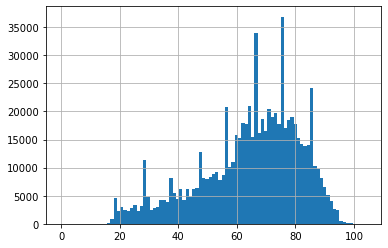

In [88]:
age.dropna().hist(bins=len(age.dropna().unique()))

### Slicing the ED visits

In [89]:
len(ed_and_ecgs['index'].unique())

244638

In [90]:
seconds_since_arrival = (ed_and_ecgs.ecg_date - ed_and_ecgs.Inskrivningstid).dt.total_seconds()
examples = ed_and_ecgs.loc[
    (seconds_since_arrival > -3600) & 
    (ed_and_ecgs.ecg_date <= ed_and_ecgs.Utskrivningstid) &
    (ed_and_ecgs.is_chest_pain) &
    (ed_and_ecgs.num_old_ecgs >= 1) & 
    #(ed_and_ecgs.Inskrivningstid >= '2011-01-01') &
    (age >= 18) & 
    (~ed_and_ecgs.Utskrivningsorsak.isin(['Avvikit']))
    ,
    :
].sort_values(by=['Alias', 'Inskrivningstid', 'ecg_date']).drop_duplicates(subset=['index'], keep='last')
examples

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id,num_old_ecgs,last_ecg_date,last_ecg_id,birthyear,sex
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0
977915,387920,{001535BA-6DB8-4740-AF5A-5BC531615A38},2014-07-16 21:22:00,2014-07-17 00:36:00,Till hemmet,True,Helsingborg,2014-07-16 21:36:39,92582,1.0,2014-02-05 19:56:02,92581.0,1982.0,0.0
843694,357340,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2012-10-15 17:00:00,2012-10-15 23:03:00,Till sjukhus,True,Helsingborg,2012-10-15 17:12:02,48213,1.0,2011-02-07 12:25:11,10598.0,1912.0,0.0
843697,357748,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2012-10-23 18:46:00,2012-10-23 21:07:00,Till avdelning,True,Helsingborg,2012-10-23 19:45:06,48212,2.0,2012-10-15 17:12:02,48213.0,1912.0,0.0
843703,388378,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2014-07-31 04:20:00,2014-07-31 08:16:00,Till avdelning,True,Helsingborg,2014-07-31 04:33:25,69475,3.0,2012-10-23 19:45:06,48212.0,1912.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958159,389041,{FFD0ACA0-1B8A-4E71-A40D-641CAA0D2EC5},2014-08-14 04:16:00,2014-08-14 07:58:00,Till avdelning,True,Helsingborg,2014-08-14 04:31:09,88785,1.0,2013-03-15 21:10:26,67364.0,1943.0,1.0
162309,50164,{FFD61BDB-E8B8-438D-8AC6-C5DB4E9A4354},2013-09-24 15:42:00,2013-09-24 18:30:59,Till avdelning,True,Lund,2013-09-24 16:16:46,174663,1.0,2010-02-07 10:56:40,174664.0,1935.0,0.0
218811,69452,{FFE71784-D431-4503-BF3A-1A17A45D46B3},2014-11-09 00:20:59,2014-11-09 05:41:00,Till hemmet,True,Lund,2014-11-09 00:35:32,110292,1.0,2014-02-18 00:37:12,110289.0,1920.0,1.0
785667,321754,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2010-06-30 19:26:00,2010-06-30 21:53:00,Till avdelning,True,Helsingborg,2010-06-30 19:34:01,10169,1.0,2010-01-04 20:34:40,10168.0,1925.0,0.0


### Analyzing the examples

In [91]:
examples.Utskrivningsorsak.value_counts()

Till hemmet        8729
Till avdelning     6901
Till sjukhus        234
Till mottagning      62
Avslutad             17
Avliden               4
Till primärvård       4
Name: Utskrivningsorsak, dtype: int64

In [92]:
examples.Origin.value_counts()

Lund           8809
Helsingborg    7142
Name: Origin, dtype: int64

<AxesSubplot:>

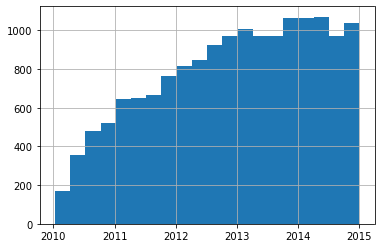

In [93]:
examples.Inskrivningstid.hist(bins=20)

<AxesSubplot:>

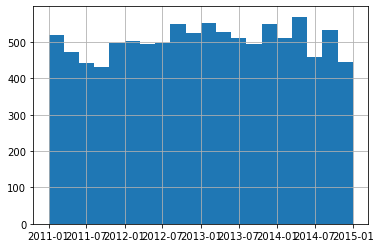

In [94]:
examples.loc[
    (examples.Inskrivningstid >= '2011-01-01') &
    (examples.last_ecg_date >= examples.Inskrivningstid - pd.Timedelta(days=365))
    ,
    'Inskrivningstid'
].hist(bins=20)

### Dealing with frequent flyers
While most patients are represented only once in the examples so far, some show up very frequently. We can define such a "frequent flyer" as having ```k``` or more visits at the ED. Our options at this point are:

* Remove all frequent flyers completely
* Keep only their first ```k``` visits. 

Here I decide to go with the first approach, simply because the time window (2010-2015) is fixed, so the first visit that we can see is not necessarily the first rodeo for the patient, as it were. In any case, I must also decide what should ```k``` be, and looking at the numbers below, 5 seems like a reasonable number.

In [95]:
foo = (
    examples
    .Alias
    .value_counts()
    .value_counts()
    .sort_index()
    .rename('num_patients')
    .reset_index()
    .rename(columns={'index': 'k'})
)
#foo
foo['num_visits'] = foo.k * foo.num_patients
foo['cumulative_visits'] = foo.num_visits.cumsum()
foo['cumulative_patients'] = foo.num_patients.cumsum()
#foo.cumulative_visits / foo.cumulative_patients
foo['patient_proportion'] = foo.num_patients / foo.cumulative_patients
foo['visits_proportion'] = foo.num_visits / foo.cumulative_visits
foo['impact'] = foo.visits_proportion / foo.patient_proportion
foo

,k,num_patients,num_visits,cumulative_visits,cumulative_patients,patient_proportion,visits_proportion,impact
0,1,6999,6999,6999,6999,1.000000,1.000000,1.000000
1,2,1606,3212,10211,8605,0.186636,0.314563,1.685437
2,3,586,1758,11969,9191,0.063758,0.146879,2.303701
3,4,237,948,12917,9428,0.025138,0.073392,2.919563
4,5,137,685,13602,9565,0.014323,0.050360,3.516027
5,6,63,378,13980,9628,0.006543,0.027039,4.132189
6,7,32,224,14204,9660,0.003313,0.015770,4.760631
7,8,26,208,14412,9686,0.002684,0.014432,5.376631
8,9,18,162,14574,9704,0.001855,0.011116,5.992590
9,10,16,160,14734,9720,0.001646,0.010859,6.596987


In [104]:
num_visits = examples.Alias.value_counts()

In [106]:
examples = examples[examples.Alias.isin(num_visits[num_visits <= 5].index)]

### Dealing with multiple visits in a single day
Sometimes a patient comes to the ED twice in a single day. Unfortunately, the contact data, which is where we find the diagnoses, only stores the dates and not time of day. That means that for these double-visits, I don't know which contact belongs to which visit, and therefore I can't calculate the index-AMI. My options are:

* Remove all those visits. But they could be "legitimate visits" and should maybe be included.
* Keep only the first visit. But then the index-diagnosis may be overly pessimistic.
* Keep only the second visit. But in reality there is no way to know that a visit would be the last in a day.
* Keep both visits, and calculate the same target for them. 

Because it only happens 7 times (so 14 visits in total), and because the problem is an artefact of incomplete data, I'm leaning towards the first option here.

In [107]:
foo = examples[["Alias", "Inskrivningstid"]]
foo.Inskrivningstid = foo.Inskrivningstid.dt.floor('1D')
index_visits_in_one_day = foo.reset_index().groupby(["Alias", "Inskrivningstid"]).count()
index_visits_in_one_day.value_counts()

index
1        13588
2            7
dtype: int64

In [108]:
examples = examples.loc[~foo.duplicated(keep=False), :]

## Calculating AMI labels
I am interested in defining labels for AMI (defined as either I21, I22 or U98), both for the "index visit" and within 30 days. Within 30 days is pretty self-explanatory. By "index visit" we mean diagnoses that are "linked" to the ED visit that we care about (which we call index). One patient may have several index visits. 

In order to figure out what diagnoses a patient received and which index visit is linked to that diagnosis, I need the "care contacts" preparead earlier in this document. Each care contact represent some contact with the health care system, and has a corresponding start and end date (but no timestamps), and a number of diagnoses. I consider a care contact to be associated with the index visit if it occurs during or after the index, and occurs either at the emergency department or when the patient is hospitalized, and if there is a "direct chain" of such previous contacts. 

Example: a patient comes to the ED in 2010-01-01 and stays until 2010-01-02. This is the index visit, and we have information about this visit from the ED. We also have (or should have) a care contact corresponding to this particular visit - we call this the index contact. Now let's say the patient is transferred to another department and stays there between 2010-01-02 to 2010-01-04. This is a separate contact, but because it overlaps with the index contact we say it is associated with the index. Then the patient may be transferred again, let's say between 2010-01-04 to 2010-01-07, and once more between 2010-01-05 and 2010-01-06. Both of these contacts will also be associated with the index. If during any of these contacts the diagnosis I21, I22 or U98 is given, we consider the original index visit to be an "index AMI".

As we will see later, there are some corner-cases that I choose to exclude from the data set:

* There is one example (a patient presenting with chest pain, with two ECGs etc) that has no care contacts at all. That patient is dropped.
* A few (95) examples have no index contacts at an ED. They are likewise dropped.
* As we saw before, some patients visit the ED multiple times in a single day. They are all dropped, because I can't figure out which contact belongs to which visit. 

### Defining AMI
Here I search all the 15 diagnosis columns for ICD codes that begin with either I21, I22 or U98, and create a new boolean column that is true whenever one of those codes are found in any of the diagnosis columns.

In [ ]:
# This is a sanity check, because regexes can be tricky sometimes
# Want to catch everything that starts with I21, I22 or U98.
pd.Series(["i21", "I21-x", "I22", "i23", "i2-1", "U981", "i2", "i2134"]).str.match("(I2[12])|(U98)", case=False)

In [109]:
diagnoses = care.loc[:, [f"diagnose{i}" for i in range(1, 16)]]
is_ami = (
    diagnoses
    .stack()
    .dropna()
    .str.match("(I2[12])|(U98)", case=False)
    .unstack()
    .any(axis='columns')
    .rename('is_ami')
)
is_ami

eventid
6674314     False
6087138     False
8221234     False
8544601     False
8006613     False
            ...  
17196574    False
16921637    False
17196580    False
16557029    False
12278500    False
Name: is_ami, Length: 4169358, dtype: bool

In [110]:
care = care.join(is_ami, how='left')
care['is_ami'].fillna(False, inplace=True)
care

,alias,activitystartdate,activityenddate,careactivityinpatientcare,unit,diagnose1,diagnose2,diagnose3,diagnose4,diagnose5,...,diagnose7,diagnose8,diagnose9,diagnose10,diagnose11,diagnose12,diagnose13,diagnose14,diagnose15,is_ami
eventid,,,,,,,,,,,,,,,,,,,,,
6684428,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-09-21,2012-09-21,False,"VÅRDCENTRALEN EDEN, MÖLLEVÅNGSGATAN 44, 21420 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6674314,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-11-13,2012-11-13,False,"VÅRDENHET HUDSJUKVÅRD, SKÅNES UNIVERSITETSSJUK...",Z039,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6087128,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-03,2012-12-03,False,"VÅRDCENTRALEN EDEN, MÖLLEVÅNGSGATAN 44, 21420 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6684472,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-05,2012-12-05,False,"VÅRDCENTRALEN EDEN, MÖLLEVÅNGSGATAN 44, 21420 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6087138,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-12,2012-12-12,False,"VÅRDCENTRALEN EDEN, MÖLLEVÅNGSGATAN 44, 21420 ...",I10-,E78-,J45-P,L65-P,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16921637,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2014-11-14,2014-11-14,False,"SPECIALISERAD MEDICIN HELSINGBORG, HELSINGBORG...",I639,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
17196580,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2014-11-21,2014-11-21,False,"SPECIALISERAD MEDICIN HELSINGBORG, HELSINGBORG...",I639,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
16557029,{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},2014-12-02,2014-12-02,False,"VE INTENSIV OCH PERIOPERATIV VÅRD MALMÖ, SKÅNE...",Z514,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [111]:
care.is_ami.value_counts()

False    7596390
True       23277
Name: is_ami, dtype: int64

In [112]:
len(care)

7619667

### The mystery patient without care contacts
One patient visited the ED (twice!) with chest pain, received ECGs and everything, but has no care contacts at all. He is later dropped.

In [113]:
example_patients = set(examples.Alias.unique())
care_patients = set(care.alias.unique())
print(
    len(example_patients),
    len(care_patients),
    len(example_patients | care_patients),
    len(example_patients & care_patients)
)

9561 101442 101443 9560


In [114]:
example_patients - care_patients

{'{2F96295E-A670-452E-8899-57AF89A59774}'}

Patient ```{2F96295E-A670-452E-8899-57AF89A59774}``` doesn't have any care data, yet we have ED visits for this patient, as well as two ECGs!

In [115]:
hbg_ed_raw[hbg_ed_raw.Alias == '{2F96295E-A670-452E-8899-57AF89A59774}']

,key_contact,Alias,age,kon,demografi_OK,indl_dato,ud_dato,vistelsetid,discharge_text,infirmary_code,...,akut_diag02,akut_diag03,akut_diag04,akut_diag05,akut_diag06,ud_diag01,ud_diag02,ud_diag03,dod_december2015,dod_dato
62950,847137-1,{2F96295E-A670-452E-8899-57AF89A59774},37.642712,1,1,15jan2014 21:59:00,16jan2014 01:08:00,189.0,Till hemmet,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
62951,847137-2,{2F96295E-A670-452E-8899-57AF89A59774},37.667351,1,1,24jan2014 13:46:00,24jan2014 16:54:00,188.0,Till avdelning,AVA-H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [116]:
examples[examples.Alias == '{2F96295E-A670-452E-8899-57AF89A59774}']

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id,num_old_ecgs,last_ecg_date,last_ecg_id,birthyear,sex
977021,379845,{2F96295E-A670-452E-8899-57AF89A59774},2014-01-24 13:46:00,2014-01-24 16:54:00,Till avdelning,True,Helsingborg,2014-01-24 14:11:24,89546,1.0,2014-01-15 22:11:03,7625.0,1976.0,1.0


### Finding the relevant care contacts
I proceed to join the examples with the care contact data and slice the result to obtain only the relevant contacts. 

In [117]:
examples = examples.sort_values(by=['Alias', 'Inskrivningstid', 'Utskrivningstid'])
cols = ['alias', 'activitystartdate', 'activityenddate', 'careactivityinpatientcare', 'unit', 'is_ami']
visits = examples.join(care[cols].reset_index().set_index('alias'), on='Alias', how='inner')
visits

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id,num_old_ecgs,last_ecg_date,last_ecg_id,birthyear,sex,eventid,activitystartdate,activityenddate,careactivityinpatientcare,unit,is_ami
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,15232997,2007-10-01,2007-10-01,False,"PRIMÄRVÅRD FÖRSLÖV, VÅRDCENTRALEN, 26973 FÖRSLÖV",False
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,15773952,2007-10-25,2007-10-25,False,"PRIMÄRVÅRD FÖRSLÖV, VÅRDCENTRALEN, 26973 FÖRSLÖV",False
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,15233125,2007-10-30,2007-10-30,False,"PRIMÄRVÅRD FÖRSLÖV, VÅRDCENTRALEN, 26973 FÖRSLÖV",False
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,15233393,2007-12-11,2007-12-11,False,"PRIMÄRVÅRD FÖRSLÖV, VÅRDCENTRALEN, 26973 FÖRSLÖV",False
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,432213,2008-02-26,2008-02-26,False,"KIRURGIMOTTAGNING ÄNGELHOLM, ÄNGELHOLMS SJUKHU...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785668,354156,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2012-08-04 09:27:00,2012-08-04 13:22:00,Till avdelning,True,Helsingborg,2012-08-04 09:32:31,1173,2.0,2010-06-30 19:34:01,10169.0,1925.0,0.0,4054226,2010-01-04,2010-01-05,True,"AKUTMOTTAGNING HELSINGBORG, HELSINGBORGS LASAR...",False
785668,354156,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2012-08-04 09:27:00,2012-08-04 13:22:00,Till avdelning,True,Helsingborg,2012-08-04 09:32:31,1173,2.0,2010-06-30 19:34:01,10169.0,1925.0,0.0,3060647,2010-06-30,2010-06-30,False,"AKUTMOTTAGNING HELSINGBORG, HELSINGBORGS LASAR...",False
785668,354156,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2012-08-04 09:27:00,2012-08-04 13:22:00,Till avdelning,True,Helsingborg,2012-08-04 09:32:31,1173,2.0,2010-06-30 19:34:01,10169.0,1925.0,0.0,4065951,2010-06-30,2010-07-01,True,"SPECIALISERAD MEDICIN HELSINGBORG, HELSINGBORG...",False
785668,354156,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2012-08-04 09:27:00,2012-08-04 13:22:00,Till avdelning,True,Helsingborg,2012-08-04 09:32:31,1173,2.0,2010-06-30 19:34:01,10169.0,1925.0,0.0,5924737,2012-08-04,2012-08-04,False,"AKUTMOTTAGNING HELSINGBORG, HELSINGBORGS LASAR...",False


In [118]:
ed_clinics = [
    'AKUTKLINIKEN LUND, SKÅNES UNIVERSITETSSJUKHUS, 22185 LUND',
    'AKUTMOTTAGNING HELSINGBORG, HELSINGBORGS LASARETT, 25187 HELSINGBORG',
    'VÅRDENHET AKUTSJUKVÅRD, SKÅNES UNIVERSITETSSJUKHUS, 22185 LUND',
    'SPECIALISERAD MEDICIN HELSINGBORG, HELSINGBORGS LASARETT, 25187 HELSINGBORG', # Including this is a bit dubious...
]

overlaps_with_index = (
    (visits.activitystartdate >= visits.Inskrivningstid.dt.floor('1D')) &
    (visits.activitystartdate <= visits.Utskrivningstid.dt.floor('1D') + pd.Timedelta(days=1))
)

index_contact = (
    visits.unit.isin(ed_clinics) &
    overlaps_with_index
)

hosp_contact = (
    visits.careactivityinpatientcare &
    (visits.activitystartdate >= visits.Inskrivningstid.dt.floor('1D'))
)

In [119]:
print(
    len(examples['index'].unique()),
    len(visits.loc[index_contact, 'index'].unique())
)

13588 13493


Here we see that there are 95 examples without an index contact at the ED. I will drop them (in a later step), because I don't trust that we have the data to tell if they got AMI or not. 

### AMI within 30 days

In [120]:
within_30_days = (
    (visits.activitystartdate >= visits.Inskrivningstid.dt.floor('1D')) &
    (visits.activitystartdate <= visits.Utskrivningstid.dt.floor('1D') + pd.Timedelta(days=30))
)
visits[within_30_days].groupby('index')['is_ami'].any().rename('ami_30_days')
ami_30_days = visits[within_30_days].groupby('index')['is_ami'].any().rename('ami_30_days')
ami_30_days

index
23         True
69        False
85        False
118       False
120        True
          ...  
395973    False
396002    False
396018    False
396031    False
396057    False
Name: ami_30_days, Length: 13566, dtype: bool

The ami_30_days has length 13566 but examples has length 13588! One of these are from the mystery patient above, while the other 21 are from examples where there was no care contacts within 30 days.

### Index AMI
Now that I have all the (potentially) relevant contacts for each ED visit, I can calculate the interval of overlapping contacts, starting at the index. I call this the "contact chain".

In [121]:
relevant_visits = visits.loc[index_contact | hosp_contact, :]

In [122]:
def make_interval(df, t0='activitystartdate', t1='activityenddate'):
    return pd.IntervalIndex.from_tuples(list(zip(df[t0], df[t1] + pd.Timedelta('1D'))), closed='both')

def combine_two_intervals(it1, it2):
    if it2.overlaps(it1):
        return pd.Interval(min(it1.left, it2.left), max(it1.right, it2.right), closed='both')
    else:
        return it1

def interval_chain(intervals):
    new_intervals = []
    prev = intervals[0]
    for interval in intervals:
        new_interval = combine_two_intervals(interval, prev)
        new_intervals.append(new_interval)
        prev = new_interval
    return new_intervals

def make_chain(df):
    return pd.Series(interval_chain(make_interval(df)), index=df.index)

In [123]:
chain = relevant_visits.groupby('Alias').apply(make_chain)

In [124]:
relevant_visits['chain_begin'] = chain.apply(lambda it: it.left).values
relevant_visits['chain_end'] = chain.apply(lambda it: it.right).values

In [125]:
index_ami = relevant_visits.loc[
    (relevant_visits.chain_begin <= relevant_visits.Utskrivningstid.dt.floor('1D') + pd.Timedelta(days=1)),
    :
].groupby('index')['is_ami'].any().rename('index_ami')
index_ami

index
23         True
69        False
85        False
118       False
120        True
          ...  
395973    False
396002    False
396018    False
396031    False
396057    False
Name: index_ami, Length: 13518, dtype: bool

### Removing examples without index contacts
Now that the labels are calculated, we can finally remove the examples that don't have any index contacts at all, and then combine all the labels for easy comparison.

In [126]:
labels = examples.join(
    pd.concat([index_ami, ami_30_days], axis='columns'), 
    on='index', 
    how='left').fillna(False)

In [127]:
has_index_contact = set(examples['index'].unique()) & set(visits.loc[index_contact, 'index'].unique())
labels = labels.loc[labels['index'].isin(has_index_contact), :]

In [128]:
print(
    labels.index_ami.sum(),
    labels.ami_30_days.sum(),
    labels.index_ami.mean(),
    labels.ami_30_days.mean()
)

811 969 0.06010523975394649 0.07181501519306308


In [129]:
len(labels)

13493

In [130]:
cases_index = set(labels.loc[labels.index_ami, 'index'].unique())
cases_30_days = set(labels.loc[labels.ami_30_days, 'index'].unique())
print(
    len(cases_index | cases_30_days),
    len(cases_index & cases_30_days)
)

969 811


## Selection bias?
Because we now select all visits with any historical ECG, and not just a fixed time window, there is a risk of selection bias in that we may oversample patients with more recent ECGs. We can examine this a bit closer by looking at the incidence of AMI for patients during 2014: if patients with historical ECGs older than 1 year has a different incidence than those with only early ECGs. 

In [131]:
labels

,index,Alias,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,is_chest_pain,Origin,ecg_date,ecg_id,num_old_ecgs,last_ecg_date,last_ecg_id,birthyear,sex,index_ami,ami_30_days
930713,384501,{0005512F-251B-4C7F-AF64-0EF014B8D981},2014-05-02 23:30:00,2014-05-03 03:46:00,Till hemmet,True,Helsingborg,2014-05-02 23:47:40,74329,1.0,2012-06-04 23:37:59,48462.0,1934.0,0.0,False,False
977915,387920,{001535BA-6DB8-4740-AF5A-5BC531615A38},2014-07-16 21:22:00,2014-07-17 00:36:00,Till hemmet,True,Helsingborg,2014-07-16 21:36:39,92582,1.0,2014-02-05 19:56:02,92581.0,1982.0,0.0,False,False
843694,357340,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2012-10-15 17:00:00,2012-10-15 23:03:00,Till sjukhus,True,Helsingborg,2012-10-15 17:12:02,48213,1.0,2011-02-07 12:25:11,10598.0,1912.0,0.0,False,False
843697,357748,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2012-10-23 18:46:00,2012-10-23 21:07:00,Till avdelning,True,Helsingborg,2012-10-23 19:45:06,48212,2.0,2012-10-15 17:12:02,48213.0,1912.0,0.0,False,False
843703,388378,{0030082E-F3C7-4393-8F03-A6F5325EAB34},2014-07-31 04:20:00,2014-07-31 08:16:00,Till avdelning,True,Helsingborg,2014-07-31 04:33:25,69475,3.0,2012-10-23 19:45:06,48212.0,1912.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958159,389041,{FFD0ACA0-1B8A-4E71-A40D-641CAA0D2EC5},2014-08-14 04:16:00,2014-08-14 07:58:00,Till avdelning,True,Helsingborg,2014-08-14 04:31:09,88785,1.0,2013-03-15 21:10:26,67364.0,1943.0,1.0,False,False
162309,50164,{FFD61BDB-E8B8-438D-8AC6-C5DB4E9A4354},2013-09-24 15:42:00,2013-09-24 18:30:59,Till avdelning,True,Lund,2013-09-24 16:16:46,174663,1.0,2010-02-07 10:56:40,174664.0,1935.0,0.0,True,True
218811,69452,{FFE71784-D431-4503-BF3A-1A17A45D46B3},2014-11-09 00:20:59,2014-11-09 05:41:00,Till hemmet,True,Lund,2014-11-09 00:35:32,110292,1.0,2014-02-18 00:37:12,110289.0,1920.0,1.0,False,False
785667,321754,{FFF69A97-BB62-4A32-A547-D0A61AEB3074},2010-06-30 19:26:00,2010-06-30 21:53:00,Till avdelning,True,Helsingborg,2010-06-30 19:34:01,10169,1.0,2010-01-04 20:34:40,10168.0,1925.0,0.0,False,False


In [132]:
labels['age'] = labels.Inskrivningstid.dt.year - labels.birthyear - 1

In [133]:
cols = ['index_ami', 'ami_30_days', 'age', 'sex']
slices = {
    "everything": labels.index,
    "one_year": (
        (labels.Inskrivningstid >= '2011-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365))
    ),
    "complement": (
        (labels.Inskrivningstid < '2011-01-01') |
        (labels.Inskrivningstid > labels.last_ecg_date + pd.Timedelta(days=365))
    ),
    "everything_2014": (
        labels.Inskrivningstid >= '2014-01-01'
    ),
    "one_year_2014":  (
        (labels.Inskrivningstid >= '2014-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365))
    ),
    "complement_2014": (
        (labels.Inskrivningstid >= '2014-01-01') &
        (labels.Inskrivningstid > labels.last_ecg_date + pd.Timedelta(days=365))
    ),
}
foo = pd.concat([labels.loc[s, cols].mean().rename(name) for name, s in slices.items()], axis='columns')
foo.append(pd.Series({name: len(labels.loc[s, cols]) for name, s in slices.items()}, name='n'))

,everything,one_year,complement,everything_2014,one_year_2014,complement_2014
index_ami,0.060105,0.058758,0.062098,0.059131,0.064325,0.052632
ami_30_days,0.071815,0.070807,0.073305,0.068482,0.072241,0.063777
age,63.886682,64.019627,63.690061,63.077558,63.930727,62.009907
sex,0.514637,0.524224,0.500459,0.510726,0.527462,0.489783
n,13493.000000,8050.000000,5443.000000,3636.000000,2021.000000,1615.000000


In [135]:
print(
    labels.loc[
        (labels.Inskrivningstid >= '2014-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365)),
        'index_ami'
    ].mean(),
    labels.loc[
        (labels.Inskrivningstid >= '2013-01-01') &
        (labels.Inskrivningstid < '2014-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365)),
        'index_ami'
    ].mean(),
    labels.loc[
        (labels.Inskrivningstid >= '2012-01-01') &
        (labels.Inskrivningstid < '2013-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365)),
        'index_ami'
    ].mean(),
    labels.loc[
        (labels.Inskrivningstid >= '2011-01-01') &
        (labels.Inskrivningstid < '2012-01-01') &
        (labels.Inskrivningstid <= labels.last_ecg_date + pd.Timedelta(days=365)),
        'index_ami'
    ].mean()
)

0.06432459178624443 0.05558194774346793 0.053075396825396824 0.062368972746331235


## Results

## Discussion

## Suggestion for further work

## References
Structure of a technical report https://unilearning.uow.edu.au/report/3b.html

## Appendix